In [287]:
#!pip install seaborn
#!pip install statsmodels
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

#SiN-AR Refractive Index (1.83 - 1.89)

In [288]:
df = pd.read_excel('Thin Film Tools SPC.xlsx', sheet_name='TRION PECVD-2 (RI & Stress) ', header=3).iloc[:, :3] #Latest data
df2 = pd.read_excel('Thin Film Tools SPC.xlsx', sheet_name='Ellipsometer SiN-AR (IGW)', header=0).loc[:, ['Date','Operator','Measurement']] #Old data
df2['Operator'] = df2['Operator'].fillna('Unknown') #Replace NaN with 'Unknown'
df3 = pd.read_excel('Thin Film Tools SPC.xlsx', sheet_name='Trion Tool Setup (SiN-AR) RI', header=0).loc[:, ['Date','Measurement']] #Old data
df3 = df3.rename(columns={'Measurement':'RI value'})
df3['Name'] = 'Unknown' #Create column 'Name'

#Rename column
df = df.rename(columns={"Measure't":'RI value'})
df2 = df2.rename(columns={'Measurement':'RI value','Operator':'Name'})

#Concatenate Old and new data
data = pd.concat([df, df2, df3],axis=0)

#Change format of Date
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'] = data['Date'].dt.date

#Sort data by 'Date'
data = data.sort_values(by='Date')
data.head()

#Null 'Date'
data.dropna(subset=['Date'], inplace=True)

data['RI value'] = data['RI value'].astype(str).str.replace('..', '.', regex=False)   #Got typing error '1..8xxx'
data['RI value'] = data['RI value'].astype(float) #change data type 'RI value' into float

In [289]:
data.describe()

,RI value
count,1814.000000
mean,1.865637
std,0.011297
min,1.830200
25%,1.860200
50%,1.864100
75%,1.874275
max,1.927800


Since mean = median, data distribution was like normal distribution.

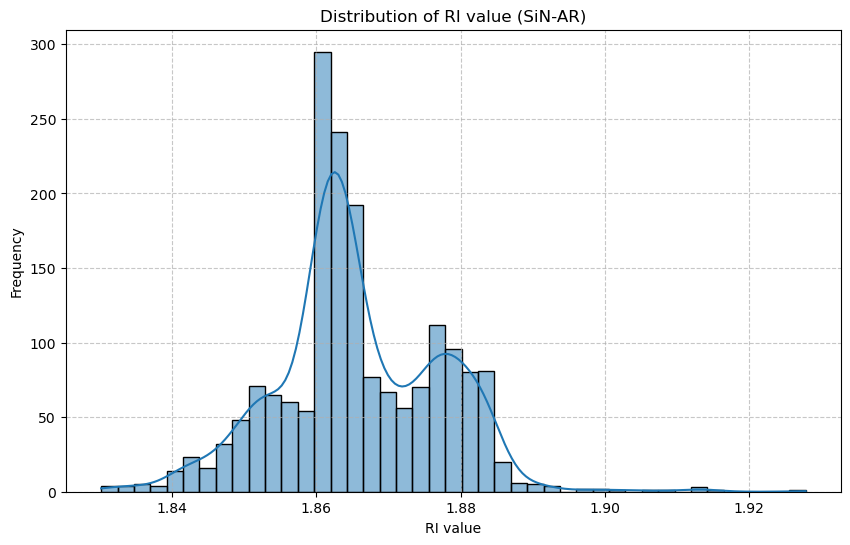

In [290]:
plt.figure(figsize=(10, 6))
sns.histplot(data['RI value'], kde=True)
plt.title('Distribution of RI value (SiN-AR)')
plt.xlabel('RI value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [291]:
data['day'] = pd.to_datetime(data['Date']).dt.day
data['day'] = data['day'].astype(int)

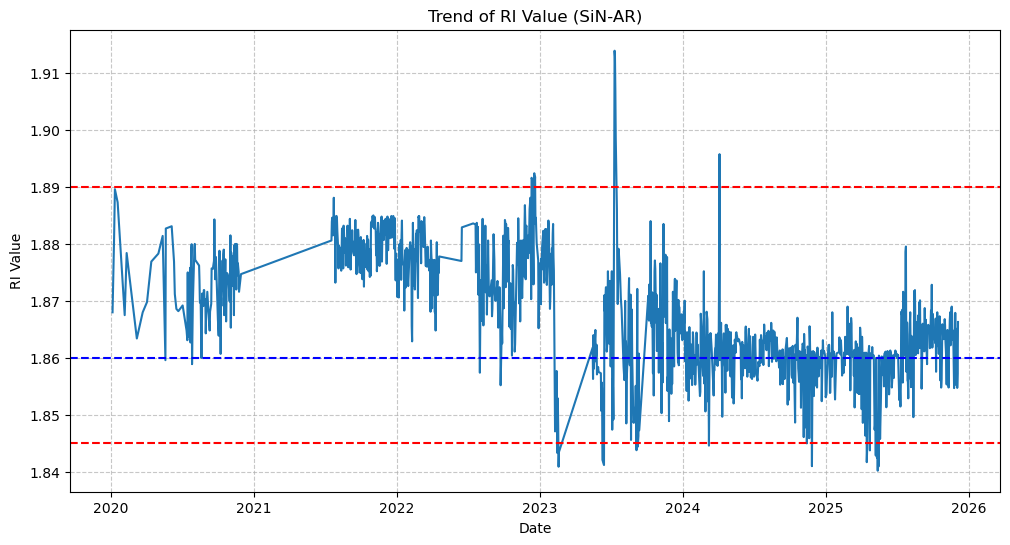

In [292]:
plt.figure(figsize=(12, 6))
y = data.groupby(by='Date')['RI value'].mean()
sns.lineplot(x=y.index, y=y)
plt.title('Trend of RI Value (SiN-AR)')
plt.xlabel('Date')
plt.ylabel('RI Value')
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=1.890, color='red', linestyle='--', label='USL')
plt.axhline(y=1.845, color='red', linestyle='--', label='LSL')
plt.axhline(y=1.860, color='blue', linestyle='--', label='LSL')
#plt.legend()
plt.show()

LSL: 1.890

USL: 1.845

Target: 1.860

1. OOS events:
- 3 major excursions (Above USL), (late 2023-mid 2024).
- multiple excursions (below LSL), (2023-mid 2025).

2. Process Performance by Time Period:
- Period 1: 2020 - Mid 2023 (High-Side Bias)
- Period 2: Mid 2023 - Late 2023 (Transition & Instability)
- Period 3: 2024 - 2026 (Lower Mean, got low-side bias Risk)



In [293]:
data.to_excel('SiN-AR_RI.xlsx', index=False)
print('Data successfully saved to SiN-AR_RI.xlsx')

Data successfully saved to SiN-AR_RI.xlsx


#Stress (SiN-AR)

In [294]:
df = pd.read_excel('Thin Film Tools SPC.xlsx', sheet_name='TRION PECVD-2 (RI & Stress) ', header=3).iloc[:, 3:6] #Latest data
df2 = pd.read_excel('Thin Film Tools SPC.xlsx', sheet_name='Trion Tool Setup (SiN-AR) Stres', header=0).loc[:, ['Date','Operator','Measurement']] #Old data
df2['Operator'] = df2['Operator'].fillna('Unknown') #Replace NaN with 'Unknown'


#Rename column
df = df.rename(columns={"Date.1":'Date','Name.1':'Name',"Measure't.1":'Stress'})
df2 = df2.rename(columns={'Measurement':'Stress','Operator':'Name'})
df2.head()

#Concatenate Old and new data
data = pd.concat([df, df2],axis=0)

#Change format of Date
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'] = data['Date'].dt.date

#Sort data by 'Date'
data = data.sort_values(by='Date')
data.head()

#Null 'Date'
data.dropna(subset=['Date'], inplace=True)

#Replace datatype from object to float
data['Stress'] = data['Stress'].astype(float)

In [295]:
data.describe()

,Stress
count,885.000000
mean,55.904047
std,61.860517
min,-48.500000
25%,3.000000
50%,30.500000
75%,99.500000
max,343.000000


Since mean > median, data distribution was right distribution.

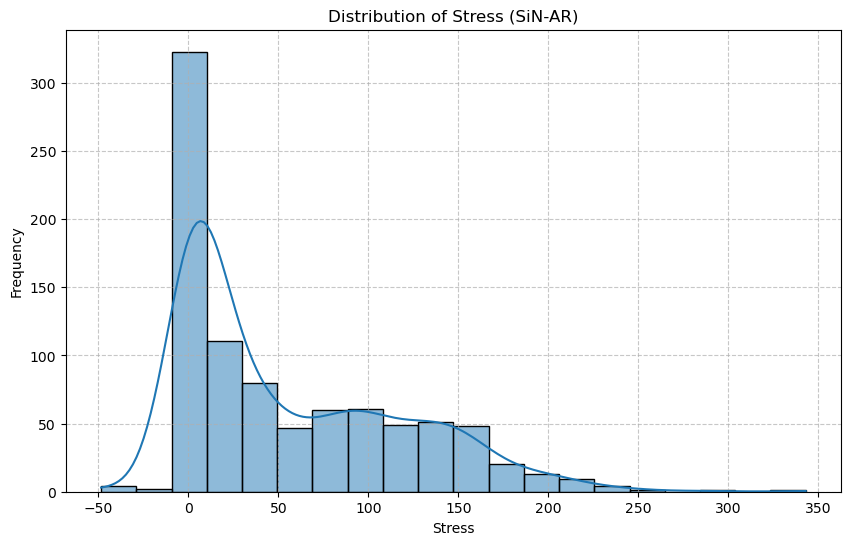

In [296]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Stress'], kde=True)
plt.title('Distribution of Stress (SiN-AR)')
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [297]:
data['day'] = pd.to_datetime(data['Date']).dt.day
data['day'] = data['day'].astype(int)

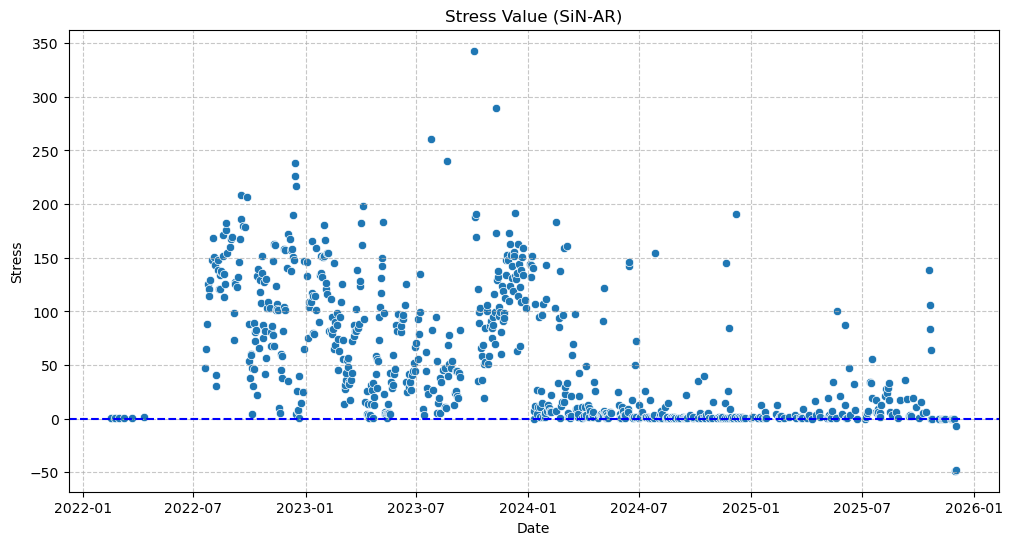

In [298]:
plt.figure(figsize=(12, 6))
y = data.groupby(by='Date')['Stress'].mean()
sns.scatterplot(x=y.index, y=y)
plt.title('Stress Value (SiN-AR)')
plt.xlabel('Date')
plt.ylabel('Stress')
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=0, color='blue', linestyle='--', label='Target')
#plt.legend()
plt.show()

Positive stress value represents tensile stress (U), while a negative stress value represents compressive stress (n).

Performance over time:
1. Phase 1: Jan-Jun 2022 (Low Density, Baseline)
2. Phase 2: Jul 2022 - Jan 2024 (High Density, High Stress)
3. Phase 3: Feb 2024 - Dec 2024 (Transitional)
4. Phase 4: Jan 2025 - Present (Low Density, Optimized)



In [299]:
data.to_excel('SiN-AR_Stress.xlsx', index=False)
print('Data successfully saved to SiN-AR_Stress.xlsx')

Data successfully saved to SiN-AR_Stress.xlsx


#Deposition Rate (SiN-Ar)

In [300]:
df = pd.read_excel('Thin Film Tools SPC.xlsx', sheet_name='TRION PECVD-2 (Dep) ', header=3).loc[:, ['Date','Name','Deposition Rate']] #Latest data
df2 = pd.read_excel('Thin Film Tools SPC.xlsx', sheet_name='TRION TOOL - SiN AR', header=0).loc[:, ['Date','Operator','Deposition Rate']] #Old data
df2['Operator'] = df2['Operator'].fillna('Unknown') #Replace NaN with 'Unknown'

#Rename column
df2 = df2.rename(columns={"Operator":'Name'})

#Concatenate Old and new data
data = pd.concat([df, df2],axis=0)

#Change format of Date
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'] = data['Date'].dt.date

#Sort data by 'Date'
data = data.sort_values(by='Date')
data.head()

#Null 'Date'
data.dropna(subset=['Date'], inplace=True)

#Replace datatype from object to float
data['Deposition Rate'] = data['Deposition Rate'].astype(float)

In [301]:
data.describe()

,Deposition Rate
count,401.000000
mean,33.711258
std,2.008520
min,28.432434
25%,32.351511
50%,33.717169
75%,34.664319
max,40.761514


Since mean = median, data distribution was normal distribution.

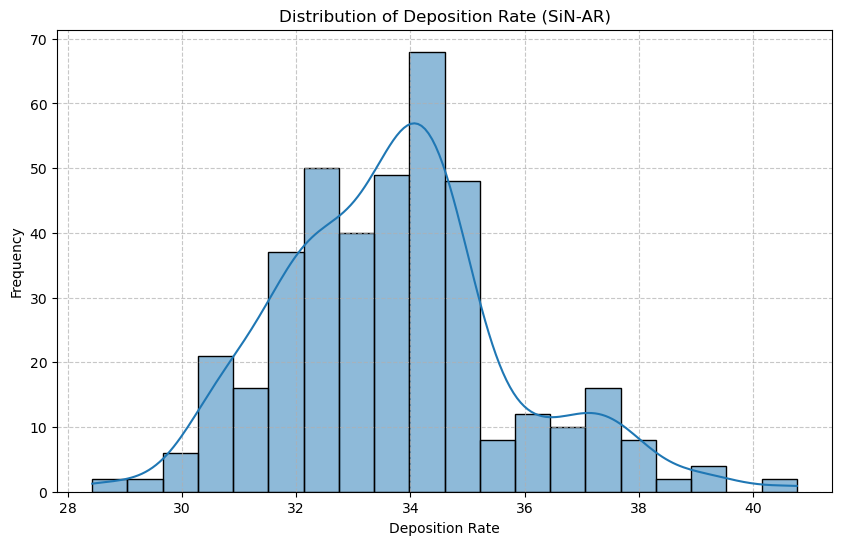

In [302]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Deposition Rate'], kde=True)
plt.title('Distribution of Deposition Rate (SiN-AR)')
plt.xlabel('Deposition Rate')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

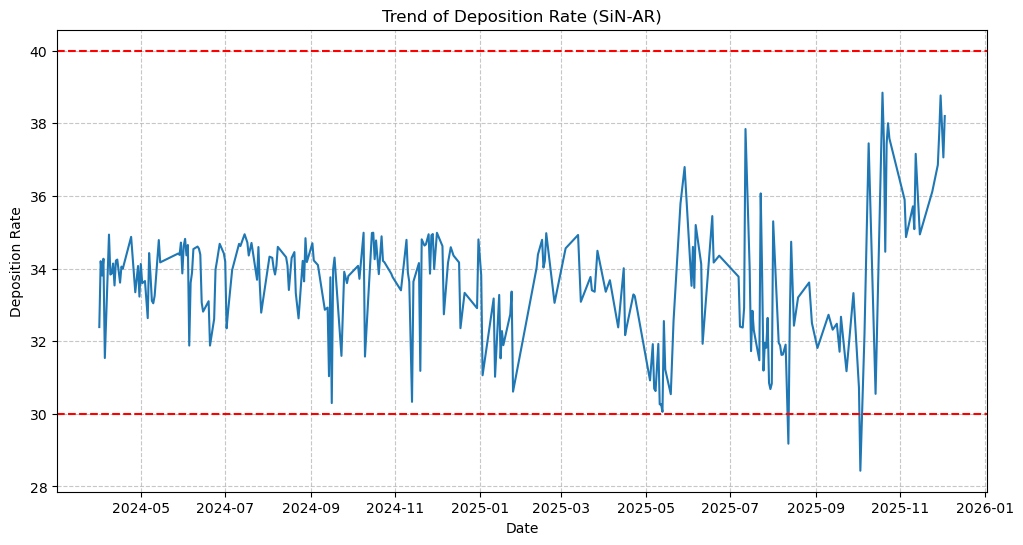

In [303]:
plt.figure(figsize=(12, 6))
y = data.groupby(by='Date')['Deposition Rate'].mean()
sns.lineplot(x=y.index, y=y)
plt.title('Trend of Deposition Rate (SiN-AR)')
plt.xlabel('Date')
plt.ylabel('Deposition Rate')
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=40, color='red', linestyle='--', label='USL')
plt.axhline(y=30, color='red', linestyle='--', label='LSL')
#plt.legend()
plt.show()

USL:40

LSL:30

Process Performance by Time Period:
1. Phase 1: April 2024 - September 2024 (Initial Stable Period)
2. Phase 2: October 2024 - April 2025 (Stable with Variation)
3. Phase 3: May 2025 - September 2025 (Instability & LSL Violations)
4. Phase 4: October 2025 - January 2026 (trending up, USL Risk)

Time by time, variation become bigger, maybe due to Equipment Degradation, Chamber Contamination/Condition, Process Parameter Drift, Recipe Change/Error, Material Quality.

In [304]:
data.to_excel('SiN-AR_DR.xlsx', index=False)
print('Data successfully saved to SiN-AR_DR.xlsx')

Data successfully saved to SiN-AR_DR.xlsx


#Thickness

In [305]:
df = pd.read_excel('Thin Film Tools SPC.xlsx', sheet_name='TRION PECVD-2 (Dep) ', header=3).loc[:, ['Date','CD3','CD8','CD13','CB8','CF8']] #Latest data
df2 = pd.read_excel('Thin Film Tools SPC.xlsx', sheet_name='TRION TOOL - SiN AR', header=0).loc[:, ['Date','CD3','CD8','CD13','CB8','CF8']] #Old data

#Concatenate Old and new data
data = pd.concat([df, df2],axis=0)

#Change format of Date
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'] = data['Date'].dt.date

#Sort data by 'Date'
data = data.sort_values(by='Date')
data.head()

#Null 'Date'
data.dropna(subset=['Date'], inplace=True)

#Replace datatype from object to float
data['CD3'] = data['CD3'].astype(float)
data['CD8'] = data['CD8'].astype(float)
data['CD13'] = data['CD13'].astype(float)
data['CB8'] = data['CB8'].astype(float)
data['CF8'] = data['CF8'].astype(float)

In [306]:
data.describe()

,CD3,CD8,CD13,CB8,CF8
count,401.000000,401.000000,401.000000,401.000000,401.000000
mean,323.908451,301.540244,317.574638,321.198529,322.291995
std,15.104956,23.390025,14.740940,14.341977,13.788201
min,229.420000,30.870000,281.490000,290.080000,290.440000
25%,314.670000,293.550000,309.120000,311.810000,313.810000
50%,321.720000,300.350000,315.020000,319.310000,320.710000
75%,332.600000,309.880000,325.160000,330.270000,329.430000
max,377.650000,391.590000,378.930000,376.630000,377.650000


Since mean = median for all, data distributions were likely normal distribution.

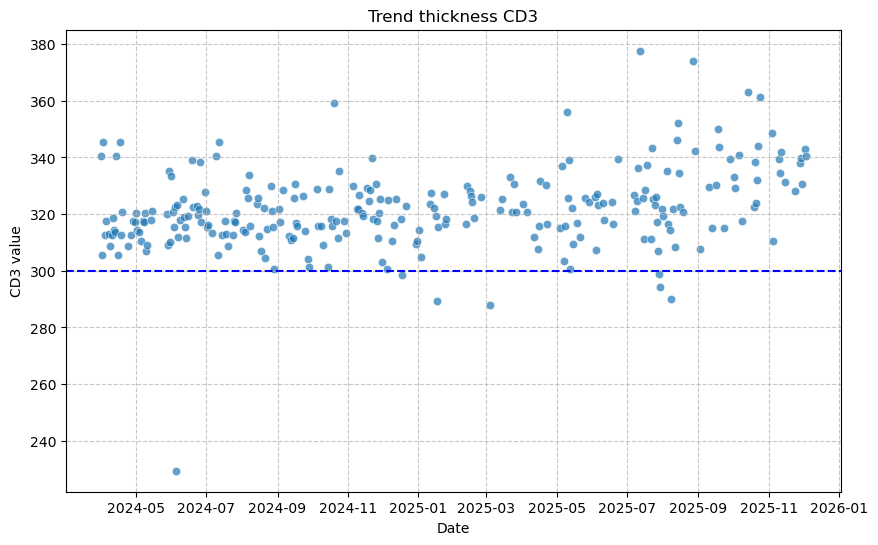

In [307]:
plt.figure(figsize=(10, 6))
y = data.groupby(by='Date')['CD3'].mean()
sns.scatterplot(x=y.index, y=y.values, alpha=0.7)
plt.title('Trend thickness CD3')
plt.xlabel('Date')
plt.ylabel('CD3 value')
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=300, color='blue', linestyle='--', label='Target')
plt.show()

Film thickness at CD3 is systematically biased high, above target.

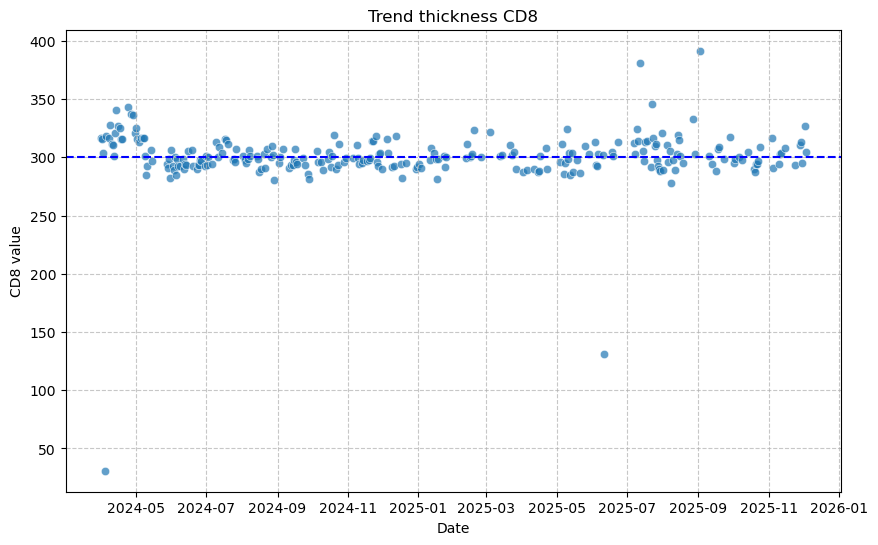

In [308]:
plt.figure(figsize=(10, 6))
y = data.groupby(by='Date')['CD8'].mean()
sns.scatterplot(x=y.index, y=y.values, alpha=0.7)
plt.title('Trend thickness CD8')
plt.xlabel('Date')
plt.ylabel('CD8 value')
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=300, color='blue', linestyle='--', label='Target')
plt.show()

Film thickness at CD8 shows good centering near the 300 nm target.

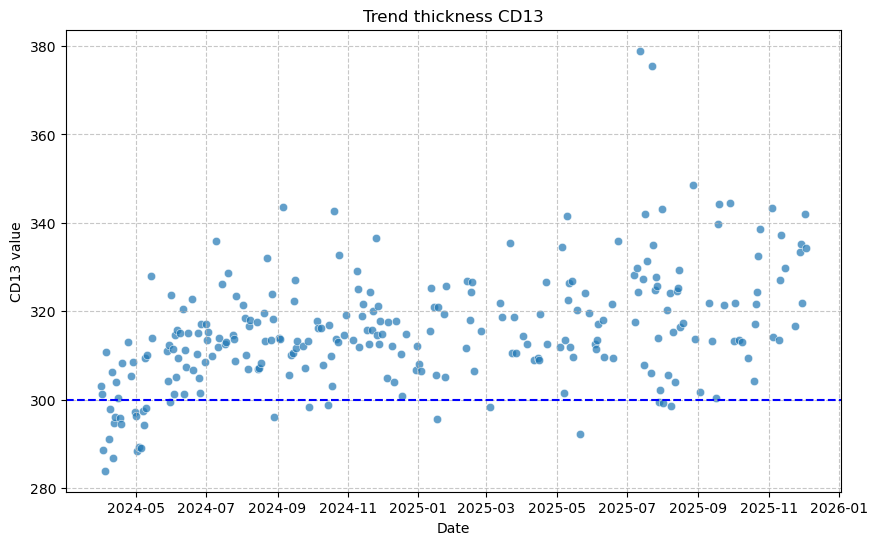

In [309]:
plt.figure(figsize=(10, 6))
y = data.groupby(by='Date')['CD13'].mean()
sns.scatterplot(x=y.index, y=y.values, alpha=0.7)
plt.title('Trend thickness CD13')
plt.xlabel('Date')
plt.ylabel('CD13 value')
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=300, color='blue', linestyle='--', label='Target')
plt.show()

Observation:
- Film thickness at CD13 exhibits a systematic upward drift from near-target performance in early 2024 (305 nm) to significantly over-target in late 2025 (320-325 nm).
- increasing variation over time (upward drift).

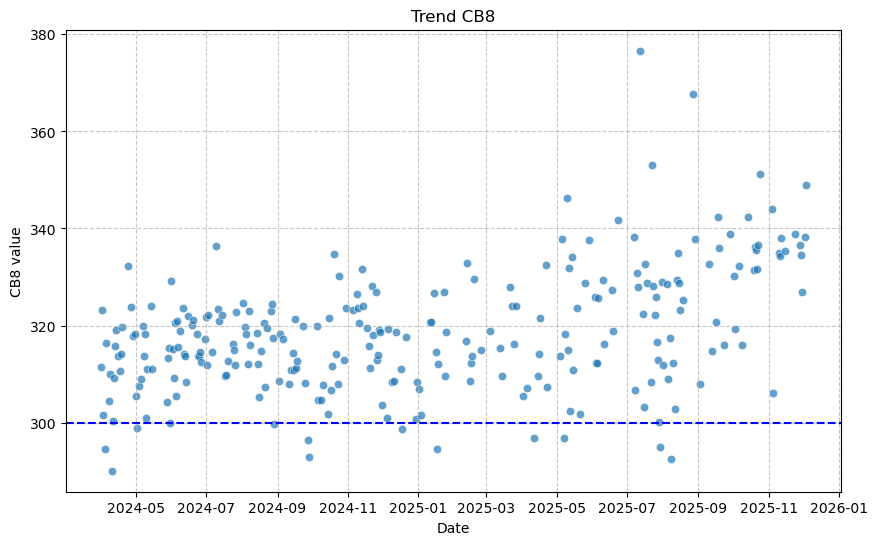

In [310]:
plt.figure(figsize=(10, 6))
y = data.groupby(by='Date')['CB8'].mean()
sns.scatterplot(x=y.index, y=y.values, alpha=0.7)
plt.title('Trend CB8')
plt.xlabel('Date')
plt.ylabel('CB8 value')
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=300, color='blue', linestyle='--', label='Target')
plt.show()

Film thickness at CB8 shows systematic upward drift from initial near-target performance.

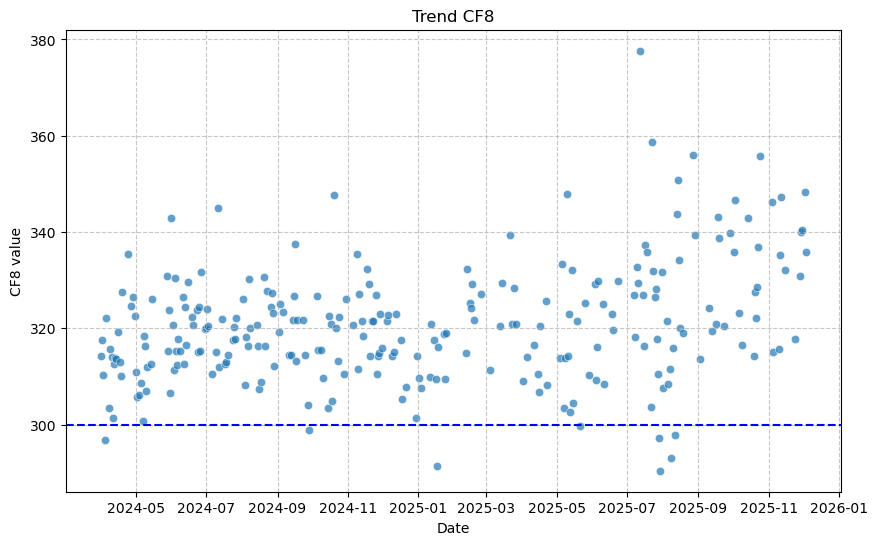

In [311]:
plt.figure(figsize=(10, 6))
y = data.groupby(by='Date')['CF8'].mean()
sns.scatterplot(x=y.index, y=y.values, alpha=0.7)
plt.title('Trend CF8')
plt.xlabel('Date')
plt.ylabel('CF8 value')
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=300, color='blue', linestyle='--', label='Target')
plt.show()

Film thickness at CF8 demonstrates consistent over-target bias (above 300 nm target) with progressive upward drift over time, increasing variation.

In [312]:
data.to_excel('SiN-AR_thickness.xlsx', index=False)
print('Data successfully saved to SiN-AR_thickness.xlsx')

Data successfully saved to SiN-AR_thickness.xlsx


#Summary

Same systematic deterioration pattern at location CD3, CD8, CD13, and CB8.
Need to check whether tool-wide or recipe-level root cause.


#Correlation

In [328]:
df = pd.read_excel('SiN-AR_RI.xlsx')
df.drop(columns=['Name','day'], inplace=True)
df2 = pd.read_excel('SiN-AR_Stress.xlsx')
df2.drop(columns=['Name','day'], inplace=True)
df3 = pd.read_excel('SiN-AR_DR.xlsx')
df3.drop(columns=['Name'], inplace=True)

In [329]:
merged_data = pd.merge(df, df2, on='Date', how='left')
merged_data = pd.merge(merged_data, df3, on='Date', how='left')

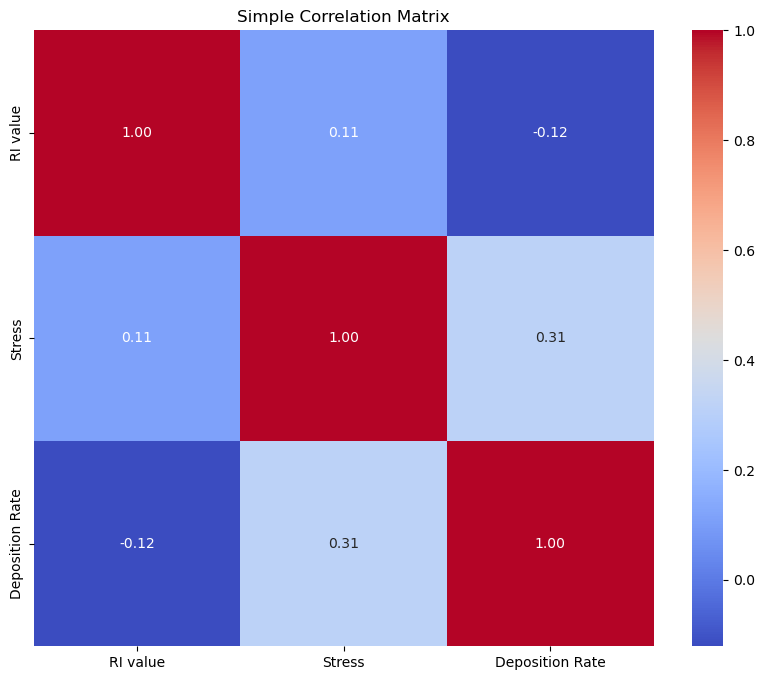

In [335]:
correlation_data = merged_data.drop(columns=['Date']).copy()
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Simple Correlation Matrix')
plt.show()

1. Key Findings:
- Stress vs. Deposition Rate (r = +0.31), Moderate positive correlation.
- Higher deposition rate → Higher film stress (more tensile).
- Lower deposition rate → Lower film stress (less tensile or more compressive).

2. Fast Deposition (High Rate) caused Higher tensile stress
- Might less time for atomic rearrangement
- More voids and defects trapped
- Higher density gradients


3. Slow Deposition (Low Rate) caused More compressive stress
- More time for atomic relaxation
- Better film densification
- More uniform structure